<a href="https://colab.research.google.com/github/ObyNtech/Neural_network/blob/main/Colab_ins_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overfitting

In [1]:
import pandas as pd
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [3]:
from google.colab import files
uploaded = files.upload()

Saving meet_or_beat.csv to meet_or_beat.csv


In [4]:
df = pd.read_csv('meet_or_beat.csv')

### Preparing the Data

In [6]:
# Use qcut to group earnings results into 5 buckets
# this is deiving the eps to 5 catergories
df['earnings_quantile'] = (pd.qcut(df['EPS'], q=5, labels=False))+1
# Verify buckets are approximately balanced
# (Slight imbalance from ties is OK)
df['earnings_quantile'].value_counts()

2    14676
1    14555
5    14268
4    14251
3    14218
Name: earnings_quantile, dtype: int64

In [17]:
# Save bucket ("quantile") value as the new  `y` variable
y_quantile = df['earnings_quantile']
set(df['earnings_quantile'])
df.head()

,EPS,forecasted_eps,noOfEsts,after_total_returns,before_total_returns,earnings_quantile
0,2.01,1.67,11.0,0.051444,0.018585,5
1,0.17,0.19,6.0,0.112955,-0.000510,3
2,-0.07,0.14,4.0,0.077167,-0.046104,2
3,0.48,0.51,8.0,-0.006130,-0.004899,4
4,-0.24,-0.27,9.0,0.089762,-0.025466,1


In [10]:
# Save the unique count of categories for later use
number_of_classes = len(y_quantile.unique())

In [11]:
# Encode quantiles into labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_quantile)
encoded_y = encoder.transform(y_quantile)
encoded_y

array([4, 2, 1, ..., 2, 1, 0])

In [12]:
# Encode labels into categories
from keras.utils.np_utils import to_categorical
y_categorical = to_categorical(encoded_y, num_classes=number_of_classes)

In [13]:
# Specify X (predictor) variables
X = df[['forecasted_eps',
              'before_total_returns','noOfEsts']]
X.head(3)

,forecasted_eps,before_total_returns,noOfEsts
0,1.67,0.018585,11.0
1,0.19,-0.000510,6.0
2,0.14,-0.046104,4.0


In [14]:
# Split into training and testing windows
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, random_state=1)

In [15]:
# Preview the `y_train` values
y_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [18]:
# Save the count of unique predictor variables for use in model
number_of_predictors = len(X.columns)
len(X.columns)

3

### Building the Model

In [19]:
# Import the `Dropout` layer
from keras.layers import Dropout
# Import regularizers
from keras.regularizers import l1, l2

In [20]:
# Build the Model
model = Sequential()
# Add a dense layer (as before)
model.add(Dense(10, input_dim=number_of_predictors, activation='relu'))
# Now add a dropout layer
model.add(Dropout(.2,input_shape=(10,)))
# Add regularization to another dense layer
model.add(Dense(5, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

In [21]:
# Add the final output layer
# (Set the # of possible outputs equal to the number classes)
model.add(Dense(number_of_classes, activation='softmax'))

In [22]:
# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer= "adam",
              metrics=['categorical_accuracy'])

In [ ]:
# Summarise the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Add in validation loss to select the number of epochs
# Fit the model
number_of_epochs = 50
model.fit(X_train,y_train,
                    epochs=number_of_epochs,
                    batch_size=1000,
                      validation_split=0.2,
                    shuffle=True)

Epoch 1/50
44/44 [==============================] - 2s 9ms/step - loss: 1.7214 - categorical_accuracy: 0.3051 - val_loss: 1.6066 - val_categorical_accuracy: 0.3810
Epoch 2/50
44/44 [==============================] - 0s 4ms/step - loss: 1.6361 - categorical_accuracy: 0.3189 - val_loss: 1.5566 - val_categorical_accuracy: 0.4331
Epoch 3/50
44/44 [==============================] - 0s 4ms/step - loss: 1.5734 - categorical_accuracy: 0.3486 - val_loss: 1.5017 - val_categorical_accuracy: 0.4554
Epoch 4/50
44/44 [==============================] - 0s 5ms/step - loss: 1.5153 - categorical_accuracy: 0.3849 - val_loss: 1.4401 - val_categorical_accuracy: 0.4664
Epoch 5/50
44/44 [==============================] - 0s 5ms/step - loss: 1.4499 - categorical_accuracy: 0.4181 - val_loss: 1.3700 - val_categorical_accuracy: 0.4628
Epoch 6/50
44/44 [==============================] - 0s 6ms/step - loss: 1.3805 - categorical_accuracy: 0.4286 - val_loss: 1.3001 - val_categorical_accuracy: 0.4676
Epoch 7/50
44/44

In [24]:
# Save model history across epochs
model_history = model.history.history
model_history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

In [25]:
# View `categorical_accuracy` for the training dataset
model_history['categorical_accuracy']

[0.30509495735168457,
 0.3189207911491394,
 0.348587304353714,
 0.3849235773086548,
 0.4181102216243744,
 0.42857804894447327,
 0.4404585361480713,
 0.4661880433559418,
 0.4972672462463379,
 0.5342519879341125,
 0.5636174082756042,
 0.5825845003128052,
 0.6040064692497253,
 0.6292265057563782,
 0.6424733400344849,
 0.6532422304153442,
 0.6655396223068237,
 0.6740851998329163,
 0.6856878399848938,
 0.6908754110336304,
 0.6953913569450378,
 0.7056970596313477,
 0.7065539360046387,
 0.7111162543296814,
 0.7140111327171326,
 0.7149606347084045,
 0.7210977077484131,
 0.7241547107696533,
 0.7249652743339539,
 0.7268874645233154,
 0.7272811532020569,
 0.7296433448791504,
 0.729319155216217,
 0.7367531061172485,
 0.7415238618850708,
 0.7402037978172302,
 0.7434923648834229,
 0.7416396737098694,
 0.7421723008155823,
 0.7469198703765869,
 0.7423112392425537,
 0.7433765530586243,
 0.7457387447357178,
 0.7479156851768494,
 0.7484714984893799,
 0.7507410645484924,
 0.749652624130249,
 0.75352013111

<Axes: title={'center': 'Performance Across Training and Validation'}>

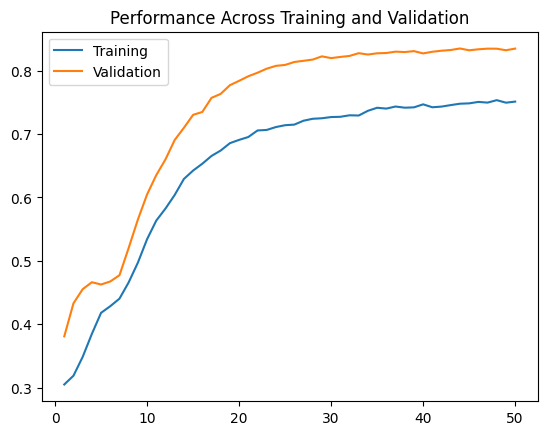

In [26]:
# Save accuracy for training and validation set across epochs
training_results = pd.DataFrame(index=range(1,number_of_epochs+1))
training_results['Training'] = model_history['categorical_accuracy']
training_results['Validation'] = model_history['val_categorical_accuracy']
training_results.plot(title = 'Performance Across Training and Validation')